# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [2]:
!pip install -r "../requirements.txt"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 10.0 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df_raw

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
df_raw.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df_raw.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
df_interin = df_raw.copy()


In [16]:
df_interin = df_interin[['Latitude', 'Longitude', 'MedInc']]
df_interin

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [17]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_interin)
df_scaled

array([[ 1.05254828, -1.32783522,  2.34476576],
       [ 1.04318455, -1.32284391,  2.33223796],
       [ 1.03850269, -1.33282653,  1.7826994 ],
       ...,
       [ 1.77823747, -0.8237132 , -1.14259331],
       [ 1.77823747, -0.87362627, -1.05458292],
       [ 1.75014627, -0.83369581, -0.78012947]])

In [19]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_scaled)
    sum_of_squared_distances.append(km.inertia_)

sum_of_squared_distances

[61919.99999999998,
 26860.979347221582,
 18987.15880229631,
 14547.511702655938,
 11838.404922494372,
 10038.64468071011,
 8731.784014738978,
 7714.021649655491,
 7020.03327161909,
 6417.069681209885,
 5895.086002778999,
 5405.061237554662,
 5060.371476608085,
 4759.457002301764]

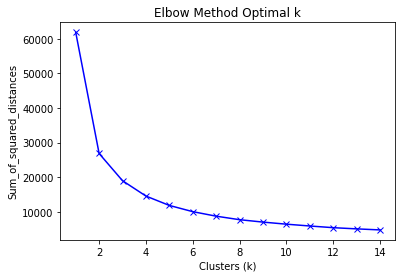

In [20]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Clusters (k)')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method Optimal k')
plt.show()

In [23]:
rango_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_avg = []
for num_clusters in rango_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df_scaled, cluster_labels))

silhouette_avg

[0.5482253273989484,
 0.5177273144600426,
 0.4349330389028119,
 0.3870746583940594,
 0.39937924011622594,
 0.37114718042324574,
 0.3540188264236593,
 0.35656810439285475,
 0.3334533208393238]

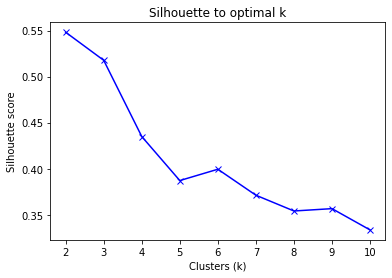

In [24]:
plt.plot(rango_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette to optimal k')
plt.show()

In [25]:
kmeans = KMeans(init="random",n_clusters=2, random_state=42, n_init=10, max_iter=300)
kmeans.fit(df_scaled)

KMeans(init='random', n_clusters=2, random_state=42)

In [27]:
df_inverse_scaled = scaler.inverse_transform(df_scaled)
df_inverse_scaled

array([[  37.88  , -122.23  ,    8.3252],
       [  37.86  , -122.22  ,    8.3014],
       [  37.85  , -122.24  ,    7.2574],
       ...,
       [  39.43  , -121.22  ,    1.7   ],
       [  39.43  , -121.32  ,    1.8672],
       [  39.37  , -121.24  ,    2.3886]])

In [30]:
df = pd.DataFrame(df_inverse_scaled ,columns=['Latitude','Longitude','MedInc'])
df['Cluster'] = kmeans.labels_
df

,Latitude,Longitude,MedInc,Cluster
0,37.88,-122.23,8.3252,0
1,37.86,-122.22,8.3014,0
2,37.85,-122.24,7.2574,0
3,37.85,-122.25,5.6431,0
4,37.85,-122.25,3.8462,0
...,...,...,...,...
20635,39.48,-121.09,1.5603,0
20636,39.49,-121.21,2.5568,0
20637,39.43,-121.22,1.7000,0
20638,39.43,-121.32,1.8672,0


In [31]:
df['Cluster'] = pd.Categorical(df_2.Cluster)

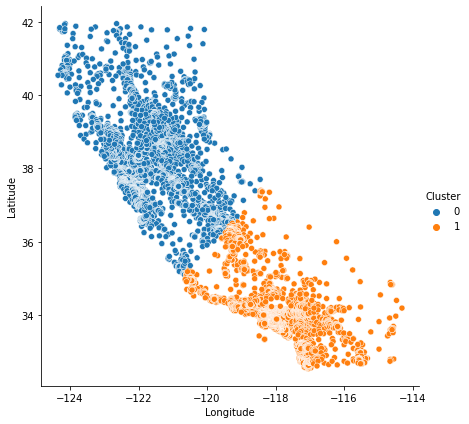

In [33]:
sns.relplot(x="Longitude", y="Latitude", hue="Cluster", data=df, height=6)
plt.show()

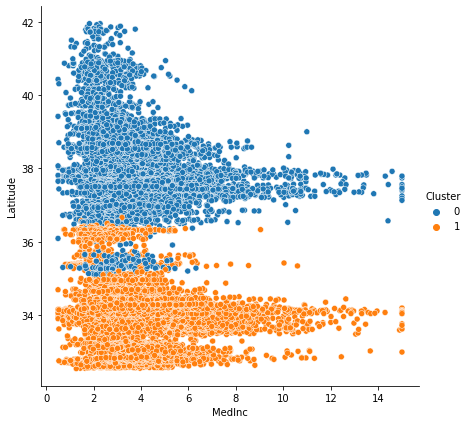

In [35]:
sns.relplot(x="MedInc", y="Latitude", hue="Cluster", data=df, height=6)
plt.show()

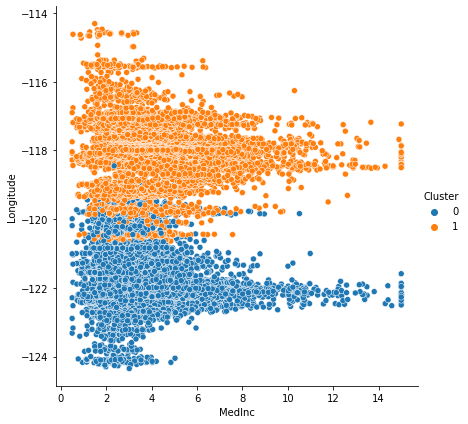

In [36]:
sns.relplot(x="MedInc", y="Longitude", hue="Cluster", data=df, height=6)
plt.show()

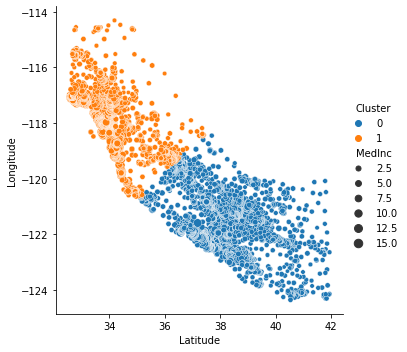

In [37]:
sns.relplot(x='Latitude', y='Longitude', data=df, kind='scatter', size = 'MedInc', hue='Cluster')
plt.show()

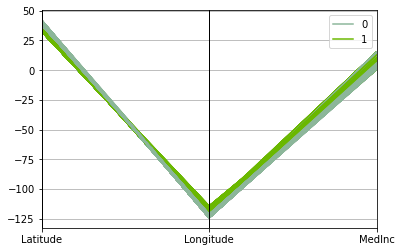

In [39]:
pd.plotting.parallel_coordinates(df, 'Cluster')
plt.show()

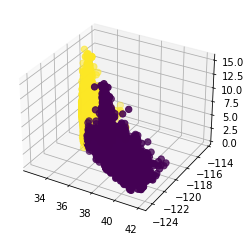

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df['Latitude'])
y = np.array(df['Longitude'])
z = np.array(df['MedInc'])

ax.scatter(x,y,z, c=df["Cluster"], s=40)

plt.show()

In [42]:
X = df[['Latitude', 'Longitude']]

pca = decomposition.PCA(n_components=2)
pca.fit(X)

X_prime = pca.transform(X)
print(pca.explained_variance_ratio_)


[0.96249233 0.03750767]


In [43]:
df_pca = pd.DataFrame(data = X_prime, columns = ['pca_1', 'pca_2'])
df['pca_1'] = df_pca['pca_1']

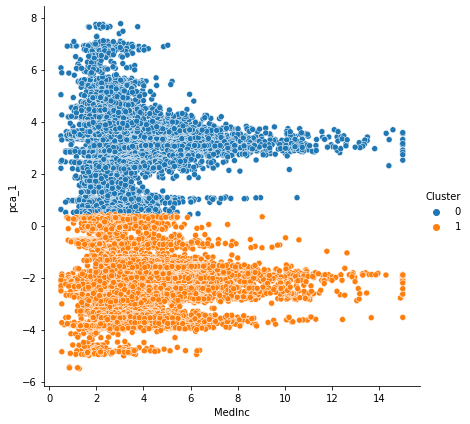

In [45]:
sns.relplot(x="MedInc", y="pca_1", hue="Cluster", data=df, height=6)
plt.show()